# Predicting House Prices using Neural Network

The purpose of this project is to learn more about neural networks.
The goal is to take the data from the __House Prices: Advanced Regression Techniques__ kaggle competition and train a neural network to predict the house prices of the homes in the test set.
By the end of this project I hope to have a better understanding of the way a neural network is trained and ways in which it can be tuned to improve performance.

I start out by loading a few packages I know I will need later on.
I then read in the data to a pandas dataframe.

In [2]:
import numpy as np
import pandas as pd
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import MinMaxScaler
#from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [3]:
df = pd.read_csv(r"~Jake\Documents\Projects\Predicting-House-Prices\input\train.csv")

## Exploratory Data Analysis

Checking the number of houses (rows) and features (columns) in the dataset helps me understand the potential complexity of the problem.
While the dataset is not what I would consider "Big Data" based on the number of records it is rather complex given the number of features.
The next rest of this section will explore these features and begin looking at how they may influence the way I go abot creating a model to predict the value of the homes in the test set.

In [6]:
df.shape

(1460, 81)

### Target Variable (SalePrice)

The target variable I am predicting is the Sale Price (USD) of the home.
All of the houses are located in Ames, Iowa as indicated in the Kaggle competition description.
This is imporatant to note ahead of time because it means the model I train will most likely not generalize well to any US house market.
A "mansion" in Ames, IA is very different then a "mansion" in Beverly Hills, CA.
The graph below shows the distribution of the home prices in the training dataset.
The _SalePrice_ variable has a positive skew.
A majority of the homes sold for less than 214k USD while a few sold for more than 500k USD.

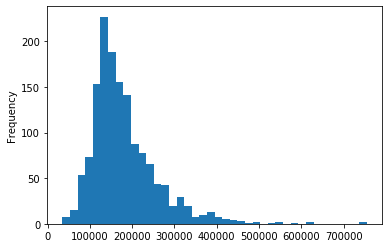

In [5]:
df.SalePrice.plot.hist(bins=40)

In [6]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Categorical Features

I split apart my exploratory data analysis into two parts.
The first part explores the categorical features in the dataset.

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [8]:
def catPlot(byCol, fs):
    df.boxplot(column='SalePrice', by=byCol, figsize=fs)
    plt.title('Sale Price by %s' % byCol)
    plt.suptitle('')
    plt.xticks(rotation=25)
    plt.ylabel('SalePrice')

In [17]:
catColumns = df.dtypes[(df.dtypes == 'object') | (df.dtypes == 'category')].index.tolist()
len(catColumns)

43

The code below utilizes the function written above to plot the _SalePrice_ by a given categorical feature.
Changing the index for the _catColumns_ list will show a different features break out. There are 43 categorical features to explore.

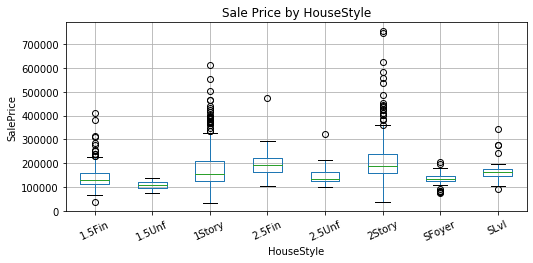

In [22]:
catPlot(catColumns[12], (8, 3.5))

The next step is to take and one hot encode each of these features.
This prepares them for use in a machine learning algorithm like a neural network.

### Numeric Features

In [6]:
num_cols = ['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']

In [7]:
df_num = df[['SalePrice'] + num_cols]

In [8]:
corr = df_num.corr()
corr.style.background_gradient(cmap='coolwarm')

,SalePrice,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea
SalePrice,1,0.613581,0.605852,0.708624,0.623431
TotalBsmtSF,0.613581,1,0.81953,0.454868,0.486665
1stFlrSF,0.605852,0.81953,1,0.566024,0.489782
GrLivArea,0.708624,0.454868,0.566024,1,0.468997
GarageArea,0.623431,0.486665,0.489782,0.468997,1


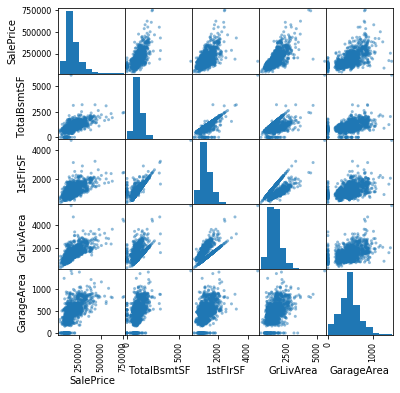

In [9]:
scat_plt = pd.plotting.scatter_matrix(df_num, figsize=(6,6))

## Neural Network

### Splitting the Data

In [10]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_num[num_cols].values
y = df_num['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Setting Up the Layers

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [161]:
model = Sequential()
model.add(Dense(12, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

W0825 13:10:40.202633 12508 deprecation.py:506] From C:\Users\Jake\Anaconda3\envs\Python36\lib\site-packages\tensorflow\python\keras\initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0825 13:10:40.267456 12508 deprecation.py:506] From C:\Users\Jake\Anaconda3\envs\Python36\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [162]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [163]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [164]:
history = model.fit(X_train, y_train, epochs=20, batch_size=50,  verbose=1, validation_split=0.2)

Train on 876 samples, validate on 219 samples
Epoch 1/20
876/876 [==============================] - 0s 441us/sample - loss: 38477862435.0685 - mean_squared_error: 38477860864.0000 - mean_absolute_error: 180342.0156 - val_loss: 39847509211.7626 - val_mean_squared_error: 39847510016.0000 - val_mean_absolute_error: 182397.5156
Epoch 2/20
876/876 [==============================] - 0s 57us/sample - loss: 38430142043.1781 - mean_squared_error: 38430146560.0000 - mean_absolute_error: 180221.2031 - val_loss: 39796914755.7991 - val_mean_squared_error: 39796916224.0000 - val_mean_absolute_error: 182273.0000
Epoch 3/20
876/876 [==============================] - 0s 46us/sample - loss: 38376446629.9909 - mean_squared_error: 38376443904.0000 - mean_absolute_error: 180086.7812 - val_loss: 39735301367.8174 - val_mean_squared_error: 39735300096.0000 - val_mean_absolute_error: 182120.5625
Epoch 4/20
876/876 [==============================] - 0s 41us/sample - loss: 38304693023.5616 - mean_squared_error: 

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


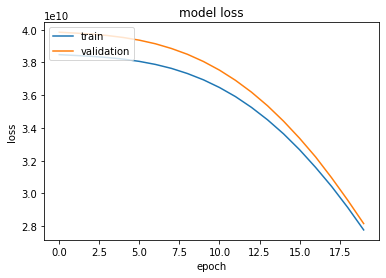

In [165]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

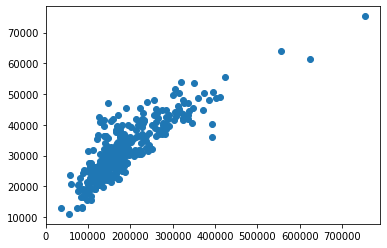

In [167]:
predictions = model.predict(X_test)
plt.scatter(x=y_test, y=predictions)